<a href="https://colab.research.google.com/github/Jaydenzk/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module1-Intro-to-Neural-Networks/LS_DS_421_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: A layer that receives input from dataset to be passed to network
### Hidden Layer: The layer in between input and output. Hyperparameter, functions
### Output Layer:Output vector of values
### Neuron:  A function that receives an input and pass it to the next layer of nodes if a certain threshold is reached
### Weight: Modifies input to report output
### Activation Function: Transform output value into format that fits the context
### Node Map: Flow chart that shows the path from inputs to outputs
### Perceptron: First and simplest kind of neural network, a single node of neural network


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

inputs = df.values
corr_out = [[1],[1],[1],[0]]

In [0]:
##### Your Code Here #####

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
# weights for our three inputs
weights = 2 * np.random.random((3,1)) - 1
weights

array([[0.06129711],
       [0.93135176],
       [0.46940512]])

In [4]:
# Create biases for node map
b = np.zeros(inputs.shape[0])
b

array([0., 0., 0., 0.])

In [5]:
# Calculate weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.46940512],
       [0.53070222],
       [1.40075688],
       [0.99264887]])

In [6]:
# Output the activated value for the end of 1 training epoch
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.61524295],
       [0.62964688],
       [0.80230397],
       [0.72961081]])

In [7]:
# take difference of output and true values to calculate error
error = corr_out - activated_output
error

array([[ 0.38475705],
       [ 0.37035312],
       [ 0.19769603],
       [-0.72961081]])

In [8]:
# Gradient descent/backprop - magic!
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.08763169],
       [ 0.08398549],
       [ 0.04225205],
       [-0.16012985]])

In [9]:
# adjust weights base on inputs
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.01484726],
       [ 0.81347396],
       [ 0.68327434]])

In [13]:
# steps we've already done:
# 1. randomly initialized weights already. Those are in memory as `weights`
# 2. we've already got input data & correct_outputs

# update our weights 100 times
for iteration in range(300):
    
    # weighted sum of inputs/weights
    weighted_sum = np.dot(inputs, weights) + b.reshape(-1,1)
    
    # activate!
    activated_output = sigmoid(weighted_sum)
    
    # calc error
    error = corr_out - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # update the weights
    weights += np.dot(inputs.T, adjustments)
    
    # update bias
    b += np.sum(adjustments, axis=1)
    
print('Weights after training:\n', weights)
print('Output after training\n', activated_output)

Weights after training:
 [[-1.98796523]
 [-1.57163952]
 [ 7.75902902]]
Output after training
 [[9.99921068e-01]
 [9.99828523e-01]
 [9.99829263e-01]
 [2.17619244e-04]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [16]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
scaley = MinMaxScaler()

X = scaley.fit_transform(diabetes[feats])

dia = pd.DataFrame(X)

In [0]:
y = np.array(diabetes.Outcome).reshape(-1,1)

In [0]:
X_test = dia.iloc[500:]
X_train = dia.iloc[0:500]

In [0]:
##### Update this Class #####

class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

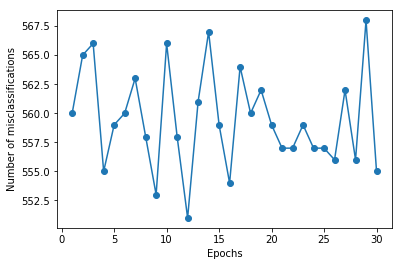

In [27]:
import matplotlib.pyplot as plt

pn = Perceptron(0.5, 30)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?